
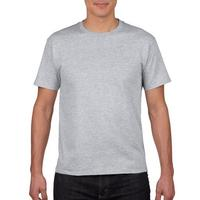


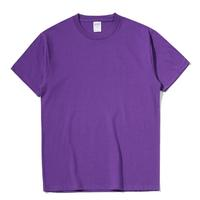


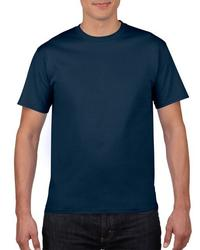


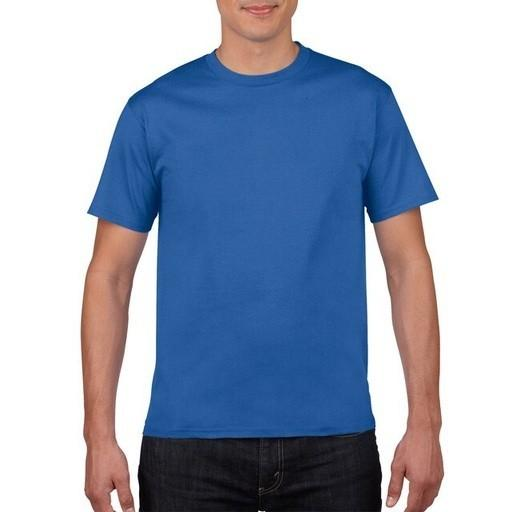


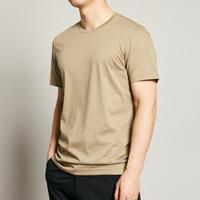


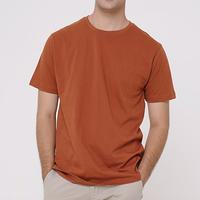


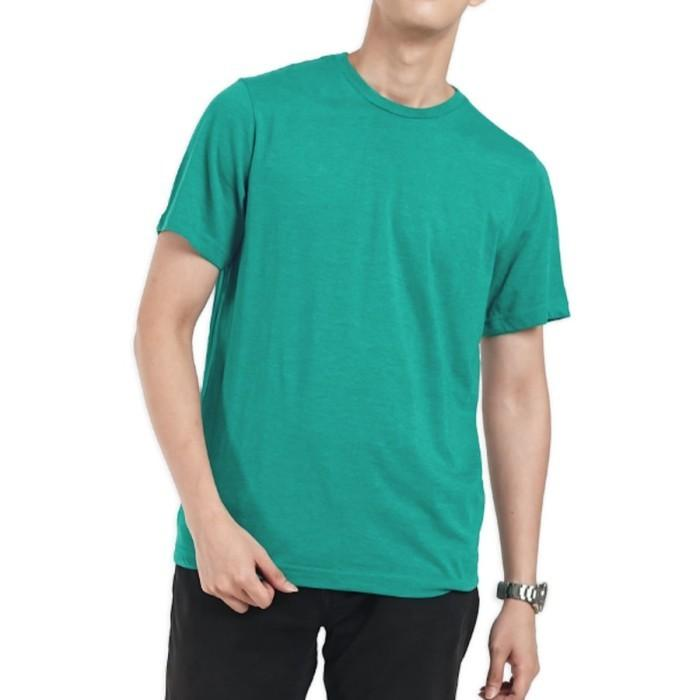


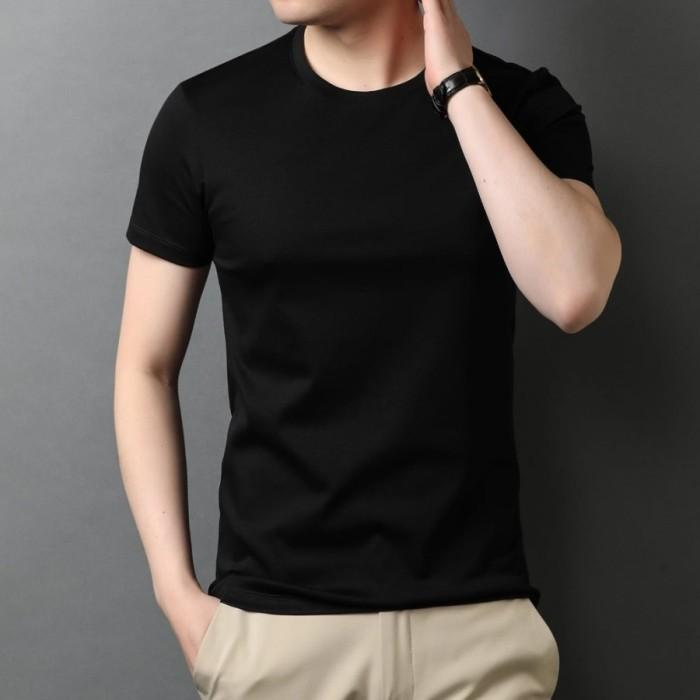


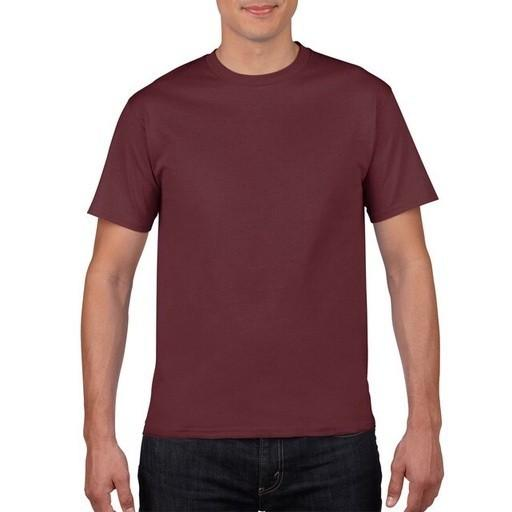


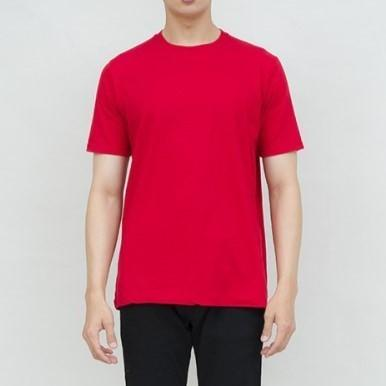

In [18]:
from IPython.display import display, HTML
import os
import numpy as np
from PIL import Image
import base64
from io import BytesIO

# Judul
judul_html = """
<div style="text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h1 style="font-size: 28px; font-weight: bold; color: #2e8b57;">🟢 SIMULASI SISTEM SORTIR OTOMATIS PRODUK</h1>
    <h2 style="font-size: 24px; font-weight: bold; color: #4682b4;">📦 BERDASARKAN WARNA DOMINAN RGB</h2>
</div>
"""
display(HTML(judul_html))

# Folder gambar simulasi produk
input_folder = r'F:\KULIAH\SEMESTER 6\PENGOLAHAN CITRA DIGITAL\Jupyter Notebook\Tugas\dataset'

# Fungsi klasifikasi jalur berdasarkan warna dominan
def sortir_jalur(avg_r, avg_g, avg_b):
    warna_tertinggi = max(avg_r, avg_g, avg_b)
    if warna_tertinggi == avg_r:
        return "A", "Merah", "red"
    elif warna_tertinggi == avg_g:
        return "B", "Hijau", "green"
    else:
        return "C", "Biru", "blue"

# Hitungan jalur
count_A = 0
count_B = 0
count_C = 0

# Ambil semua gambar
image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

if not image_files:
    print("⛔ Tidak ada gambar ditemukan.")
else:
    for img_name in image_files:
        img_path = os.path.join(input_folder, img_name)

        # Baca gambar dan konversi ke RGB
        image = Image.open(img_path).convert("RGB")
        img_np = np.array(image)

        # Hitung rata-rata RGB
        avg_r = np.mean(img_np[:, :, 0])
        avg_g = np.mean(img_np[:, :, 1])
        avg_b = np.mean(img_np[:, :, 2])

        # Tentukan jalur sortir
        jalur, warna, color_code = sortir_jalur(avg_r, avg_g, avg_b)
        if jalur == "A": count_A += 1
        if jalur == "B": count_B += 1
        if jalur == "C": count_C += 1

        # Konversi gambar ke base64 untuk HTML
        buffered = BytesIO()
        image.save(buffered, format="PNG")
        img_str = base64.b64encode(buffered.getvalue()).decode()

        # Tampilkan dalam layout 2 kolom
        html_output = f"""
        <div style="display: flex; align-items: center; gap: 30px; margin-bottom: 30px; padding: 15px; border: 1px solid #ccc; border-radius: 10px;">
            <div>
                <img src="data:image/png;base64,{img_str}" width="250" style="border-radius:10px; border: 1px solid #999;"/>
            </div>
            <div style="flex:1;">
                <h3 style="margin: 0;">🖼️ <strong>{img_name}</strong></h3>
                <p><strong>R:</strong> {avg_r:.0f}, <strong>G:</strong> {avg_g:.0f}, <strong>B:</strong> {avg_b:.0f}</p>
                <p><strong>Warna Dominan:</strong> <span style="color:{color_code}; font-weight:bold;">{warna}</span></p>
                <div style="width: 100px; height: 100px; background-color:{color_code}; border-radius: 10px;"></div>
                <h4 style="margin-top:10px;">📦 Masuk ke <strong>Jalur {jalur}</strong></h4>
            </div>
        </div>
        """
        display(HTML(html_output))

    # Ringkasan akhir
    summary_html = f"""
    <hr>
    <div style="text-align:center; margin-top: 30px;">
        <h3>🧮 Ringkasan Sortir</h3>
        <p>Jalur A (Merah): <strong>{count_A}</strong> gambar</p>
        <p>Jalur B (Hijau): <strong>{count_B}</strong> gambar</p>
        <p>Jalur C (Biru): <strong>{count_C}</strong> gambar</p>
        <p style="margin-top:20px;">✅ Proses sortir selesai!</p>
    </div>
    """
    display(HTML(summary_html))
